In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from os import system
from IPython.display import Image

In [2]:
CR=pd.read_csv("c:\\Users\\Administrator\\Downloads\\credit.csv")

In [3]:
CR.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
for feature in CR.columns:
    if CR[feature].dtype =='object':
        print(CR[feature].value_counts(),'\n')

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64 

credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64 

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64 

savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64 

employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64 

other_credit
none     814
bank     139
store     47
Name: count, dtype: int64 

housing
own      713
rent     179
other    108
Name: count, dtype: int64 

job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64 



In [5]:
replace_struc= {'checking_balance':{'< 0 DM':0,  '1 - 200 DM': 1,'> 200 DM': 2, 'unknown': -1,},

                'credit_history':{ 'critical':0, 'poor': 1, 'good':2, 'very good': 3, 'perfect':4},
                
                'savings_balance':{'< 100 DM':0, '100 - 500 DM':1,'500 - 1000 DM':2, '> 1000 DM':3, 'unknown': -1 },

                'employment_duration': {'unemployed':0, '< 1 year':1, '1 - 4 years':2, '4 - 7 years':3, '> 7 years':4},
                
                'job': {'unemployed':0, 'unskilled':1, 'skilled':2, 'management':3}, 

                'phone':{'no':0,'yes':1},

                'default':{'no':0, 'yes':1}}


onehot_cols=['purpose','other_credit','housing']


In [6]:
CR=CR.replace(replace_struc)
CR=pd.get_dummies(CR, columns=onehot_cols)
CR.head(10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8740\1586157072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  CR=CR.replace(replace_struc)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent
0,0,6,0,1169,-1,4,4,4,67,2,...,False,False,True,False,False,True,False,False,True,False
1,1,48,2,5951,0,2,2,2,22,1,...,False,False,True,False,False,True,False,False,True,False
2,-1,12,0,2096,0,3,2,3,49,1,...,False,True,False,False,False,True,False,False,True,False
3,0,42,2,7882,0,3,2,4,45,1,...,False,False,True,False,False,True,False,True,False,False
4,0,24,1,4870,0,2,3,4,53,2,...,False,False,False,False,False,True,False,True,False,False
5,-1,36,2,9055,-1,2,2,4,35,1,...,False,True,False,False,False,True,False,True,False,False
6,-1,24,2,2835,2,4,3,4,53,1,...,False,False,True,False,False,True,False,False,True,False
7,1,36,2,6948,0,2,2,2,35,1,...,False,False,False,False,False,True,False,False,False,True
8,-1,12,2,3059,3,3,2,4,61,1,...,False,False,True,False,False,True,False,False,True,False
9,1,30,0,5234,0,0,4,2,28,2,...,False,False,False,False,False,True,False,False,True,False


In [7]:
CR.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent
0,0,6,0,1169,-1,4,4,4,67,2,...,False,False,True,False,False,True,False,False,True,False
1,1,48,2,5951,0,2,2,2,22,1,...,False,False,True,False,False,True,False,False,True,False
2,-1,12,0,2096,0,3,2,3,49,1,...,False,True,False,False,False,True,False,False,True,False
3,0,42,2,7882,0,3,2,4,45,1,...,False,False,True,False,False,True,False,True,False,False
4,0,24,1,4870,0,2,3,4,53,2,...,False,False,False,False,False,True,False,True,False,False
5,-1,36,2,9055,-1,2,2,4,35,1,...,False,True,False,False,False,True,False,True,False,False
6,-1,24,2,2835,2,4,3,4,53,1,...,False,False,True,False,False,True,False,False,True,False
7,1,36,2,6948,0,2,2,2,35,1,...,False,False,False,False,False,True,False,False,False,True
8,-1,12,2,3059,3,3,2,4,61,1,...,False,False,True,False,False,True,False,False,True,False
9,1,30,0,5234,0,0,4,2,28,2,...,False,False,False,False,False,True,False,False,True,False


In [8]:
CR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  job                           1000 non-null   int64
 11  dependents                    1000 non-null   int64
 12  phone                         1000 non-null   int64
 13  default                       1000

In [9]:
# spliting the dataset
X= CR.drop('default', axis=1)
y= CR['default']

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20,random_state=22)

In [11]:
X_train['job'].unique()

array([2, 1, 3, 0], dtype=int64)

In [12]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 800 entries, 926 to 885
Series name: default
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB


In [13]:
# Creating Decision Tree (Basic model)

dtree_base= DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
dtree_base.fit(X_train,y_train)

#Scoring
print("Traning score for base model:", dtree_base.score(X_train,y_train))
print("Traning score for base model:", dtree_base.score(X_test,y_test))


base_char_label=['No','Yes']
Cred_Tree_basefile= open('Base.dot','w')
dot_basedata=export_graphviz(dtree_base, out_file=Cred_Tree_basefile, feature_names=list(X_train),class_names=list(base_char_label))
Cred_Tree_basefile.close()


# Genrating Tree 
base_code = system('dot -Tpng Base.dot -o Base.png')
if base_code>0:
    print('System command returning error :' + str(base_code))
else:
    display(Image('Base.png'))    

Traning score for base model: 0.77875
Traning score for base model: 0.735


FileNotFoundError: No such file or directory: 'Base.png'

FileNotFoundError: No such file or directory: 'Base.png'

<IPython.core.display.Image object>

In [14]:
dtree_base_imp_feat= pd.DataFrame(dtree_base.feature_importances_,columns=['Imp_Feat'],index=X_train.columns)
dtree_base_imp_feat[dtree_base_imp_feat['Imp_Feat'] !=0]

,Imp_Feat
checking_balance,0.333683
months_loan_duration,0.208099
credit_history,0.087025
amount,0.035027
savings_balance,0.023644
employment_duration,0.089964
percent_of_income,0.010532
years_at_residence,0.034065
age,0.084565
job,0.028161


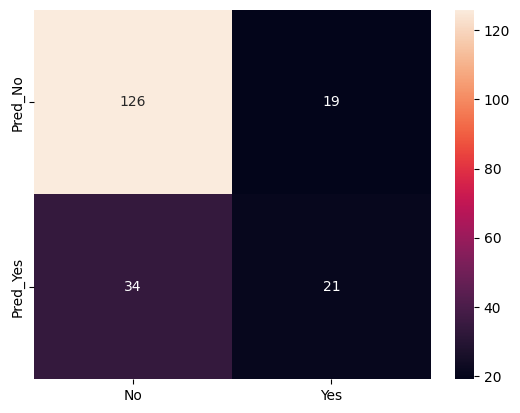

In [15]:
# creating Confusion Matrix For Base model 
y_pred_base=dtree_base.predict(X_test)

cm_base=confusion_matrix(y_test,y_pred_base,labels=[0,1])
cm_base_df=pd.DataFrame(cm_base,index=['Pred_No','Pred_Yes'],columns=['No','Yes'])

sns.heatmap(cm_base_df,annot=True,fmt='g');

Training score bagging model :  0.85125
Training score bagging model :  0.795


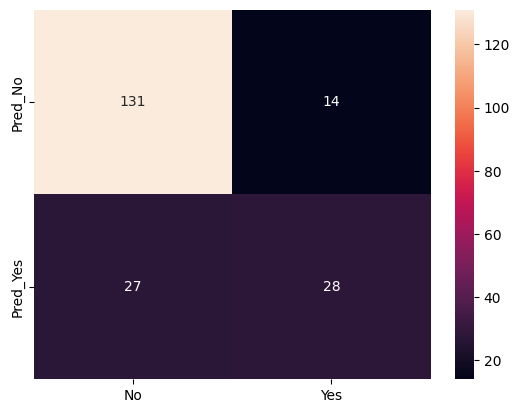

In [24]:
# creat decision tree with boosting

dtree_bag=BaggingClassifier(estimator=dtree_base, n_estimators=50,random_state=1)
dtree_bag.fit(X_train,y_train)

# scoring 

print("Training score bagging model : " , dtree_bag.score(X_train,y_train))

print("Training score bagging model : " , dtree_bag.score(X_test,y_test))

y_pred_bag= dtree_bag.predict(X_test)


# creating confusion matrix

cm_bag= confusion_matrix(y_test,y_pred_bag,labels=[0,1])

cm_bag_df=pd.DataFrame(cm_bag,index=['Pred_No','Pred_Yes'],columns=['No','Yes'])

sns.heatmap(cm_bag_df, annot=True, fmt='g');

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training score Ada-Boosting model :  0.7925
Training score Ada-Boosting model :  0.785


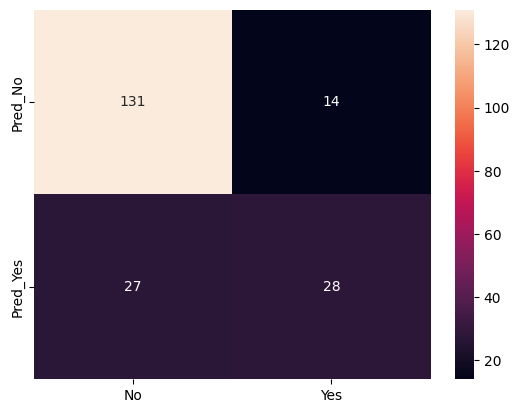

In [25]:
# creat Ada-Boosting model

dtree_adab=AdaBoostClassifier(n_estimators=50,random_state=1)
dtree_adab.fit(X_train,y_train)

# scoring 

print("Training score Ada-Boosting model : " , dtree_adab.score(X_train,y_train))

print("Training score Ada-Boosting model : " , dtree_adab.score(X_test,y_test))

y_pred_bag= dtree_bag.predict(X_test)


# creating confusion matrix

cm_adab= confusion_matrix(y_test,y_pred_bag,labels=[0,1])

cm_adab_df=pd.DataFrame(cm_adab,index=['Pred_No','Pred_Yes'],columns=['No','Yes'])

sns.heatmap(cm_bag_df, annot=True, fmt='g');

Training score Gradient-Boosting model :  0.8575
Training score Gradient-Boosting model :  0.79


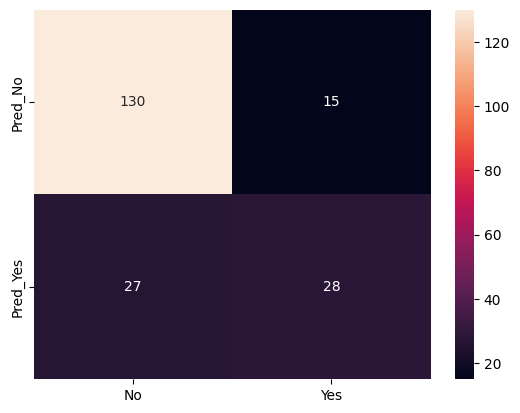

In [26]:
# creat Gradient Boosting  model

dtree_grad=GradientBoostingClassifier(n_estimators=50,random_state=1)
dtree_grad.fit(X_train,y_train)

# scoring 

print("Training score Gradient-Boosting model : " , dtree_grad.score(X_train,y_train))

print("Training score Gradient-Boosting model : " , dtree_grad.score(X_test,y_test))

y_pred_grad= dtree_grad.predict(X_test)


# creating confusion matrix

cm_grad= confusion_matrix(y_test,y_pred_grad,labels=[0,1])

cm_grad_df=pd.DataFrame(cm_grad,index=['Pred_No','Pred_Yes'],columns=['No','Yes'])

sns.heatmap(cm_grad_df, annot=True, fmt='g');

Training score Random Forest model :  1.0
Training score Random Forest model :  0.765


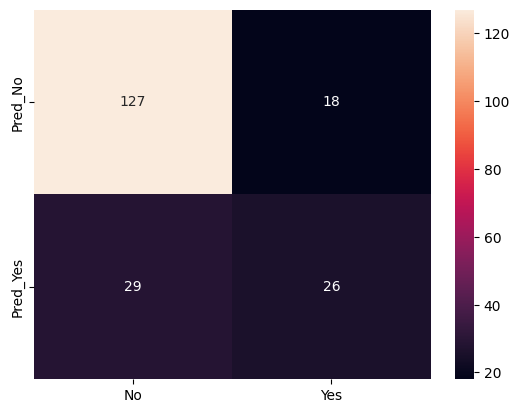

In [27]:
# creat Random Forest  model

dtree_rf=RandomForestClassifier(n_estimators=50,random_state=1,max_features=10)
dtree_rf.fit(X_train,y_train)

# scoring 

print("Training score Random Forest model : " , dtree_rf.score(X_train,y_train))

print("Training score Random Forest model : " , dtree_rf.score(X_test,y_test))

y_pred_rf= dtree_rf.predict(X_test)


# creating confusion matrix

cm_rf= confusion_matrix(y_test,y_pred_rf,labels=[0,1])

cm_rf_df=pd.DataFrame(cm_rf,index=['Pred_No','Pred_Yes'],columns=['No','Yes'])

sns.heatmap(cm_rf_df, annot=True, fmt='g');